# 대회 주제

# S3E7 Binary Classification with a Tabular Reservation Cancellation Dataset
 - https://www.kaggle.com/competitions/playground-series-s3e7

- 2024.04.17 최종제출, 스코어 **0.91256** [링크](https://www.kaggle.com/competitions/playground-series-s3e7/leaderboard)

## 모듈 가져오기

In [12]:
!pip install -q joblib==1.3
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/

In [1]:
from pycaret.classification import *

In [1]:
!pip install -q catboost
!pip install --upgrade -q xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, auc, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,\
                            RocCurveDisplay, classification_report

from sklearn.preprocessing import StandardScaler, RobustScaler

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import pkg_resources

# 사용된 모듈과 버전 가져오기
modules = [
    'pandas',
    'matplotlib',
    'numpy',
    'seaborn',
    'scipy',
    'scikit-learn',
    'lightgbm',
    'xgboost',
    'catboost'
]

module_versions = {}

for module in modules:
    try:
        version = pkg_resources.get_distribution(module).version
    except pkg_resources.DistributionNotFound:
        version = 'Not Found'
    module_versions[module] = version

module_df = pd.DataFrame(module_versions.items(), columns=['Module', 'Version']).set_index('Module')
module_df

,Version
Module,
pandas,2.0.3
matplotlib,3.7.1
numpy,1.25.2
seaborn,0.13.1
scipy,1.11.4
scikit-learn,1.2.2
lightgbm,4.1.0
xgboost,2.0.3
catboost,1.2.5


## 데이터 upload via github

In [3]:
train = pd.read_csv("https://raw.githubusercontent.com/ppianist89/Finalproject_1/main/train.csv",index_col="id")
test  = pd.read_csv('https://raw.githubusercontent.com/ppianist89/Finalproject_1/main/test.csv',index_col='id')
submission = pd.read_csv("https://raw.githubusercontent.com/ppianist89/Finalproject_1/main/sample_submission.csv")

train.shape,test.shape,submission.shape

((42100, 18), (28068, 17), (28068, 2))

In [ ]:
test.sample(5).T

id,48469,50750,53858,53294,47082
no_of_adults,2.0,2.0,2.0,2.00,2.00
no_of_children,0.0,0.0,0.0,0.00,0.00
no_of_weekend_nights,0.0,0.0,2.0,1.00,2.00
no_of_week_nights,2.0,3.0,1.0,2.00,1.00
type_of_meal_plan,2.0,0.0,0.0,0.00,0.00
required_car_parking_space,0.0,0.0,0.0,0.00,0.00
room_type_reserved,1.0,0.0,1.0,0.00,2.00
lead_time,377.0,56.0,80.0,133.00,32.00
arrival_year,2018.0,2018.0,2018.0,2018.00,2017.00
arrival_month,10.0,2.0,9.0,11.00,9.00


## score log 정리

In [7]:

import plotly.express as px
import plotly.graph_objects as go
# 실험 로그 데이터프레임 생성
exp_log = [
    ['2024-04-11', '피처 요약표 최초 작성 및 1차 모델 생성', 'Rf & Lr', 0.88478],
    ['2024-04-12', '요약표 기반 구간별 전략 수립', 'XGB_w/o_hyperparameter', 0.88923],
    ['2024-04-13', 'False date 발견, 나머지 4,6,9월에도 false값 존재', 'Cat_w_hyperparameter', 0.89544],
    ['2024-04-14', 'Pipeline & 교차검증 & AutoML 구현', 'Cat_w_hyperparameter', 0.89910],
    ['2024-04-15', 'train,test dataset에 존재하는 중복값 발견 & api 탐색 & 추가제출을 통한 스코어 향상', 'Cat_w_hyperparameter', 0.90735],
    ['2024-04-16', '중복값에 대한 해결 및 추가 EDA 진행', 'finalize model', 0.91167],
    ['2024-04-17', 'Hyperparameter값 조정으로 인한 성능 향상', 'finalize model', 0.91205],
    ['2024-04-18','최종 스코어 획득 및 process 정리','finalize model',0.91256]
]

progress = pd.DataFrame(exp_log, columns=['date', 'task', 'model', 'AUC_score'])

# datetime 형식으로 변환
progress['date'] = pd.to_datetime(progress['date'])

# Gantt 차트를 위한 데이터프레임 생성
gantt_data = pd.DataFrame({
    'Task': progress['task'],
    'Start': progress['date'],
    'Finish': progress['date'] + pd.to_timedelta('1 days'), # 작업은 하루 동안 진행됨
    'AUC Score': progress['AUC_score']
})

# Gantt 차트 생성
fig = px.timeline(gantt_data, x_start='Start', x_end='Finish', y='Task', title='Project Progress',
                  labels={'Task': 'Task', 'Start': 'Start Date', 'Finish': 'End Date', 'AUC Score': 'AUC Score'})

# AUC 스코어 텍스트 표시
fig.add_trace(go.Scatter(
    x=gantt_data['Start'] + (gantt_data['Finish'] - gantt_data['Start']) / 2,
    y=gantt_data['Task'],
    text=gantt_data['AUC Score'].map('{:.5f}'.format),
    textposition='middle center',
    textfont=dict(color='white', family='bold',size=16),
    mode='text'
))

# 시각화
fig.update_yaxes(categoryorder='total ascending') # 작업 순서 지정
fig.show()

## EDA

In [4]:
# EDA를 위한 year,month,date의 datetime 생성

# datetime 변환 위한 오류 날짜 정정 작업
train['arrival_year_month'] = pd.to_datetime(train['arrival_year'].astype(str)
                                            +train['arrival_month'].astype(str), format='%Y%m')
test['arrival_year_month'] = pd.to_datetime(test['arrival_year'].astype(str)
                                            +test['arrival_month'].astype(str), format='%Y%m')
train.loc[train.arrival_date > train.arrival_year_month.dt.days_in_month, 'arrival_date'] = train.arrival_year_month.dt.days_in_month
test.loc[test.arrival_date > test.arrival_year_month.dt.days_in_month, 'arrival_date'] = test.arrival_year_month.dt.days_in_month

train.drop(columns='arrival_year_month', inplace=True)
test.drop(columns='arrival_year_month', inplace=True)

# datetime 피처 생성
train['datetime'] = pd.to_datetime(train['arrival_year'].astype(str)
                                   +train['arrival_month'].astype(str)
                                   +train['arrival_date'].astype(str), format='%Y%m%d')
train['weekday'] = train['datetime'].dt.weekday

# 주말 여부 변환 - 토(5), 일(6)일 경우 1
train['weekend'] = [1 if x in [5, 6] else 0 for x in train['weekday']]

### Pairplot

<Figure size 1200x800 with 0 Axes>

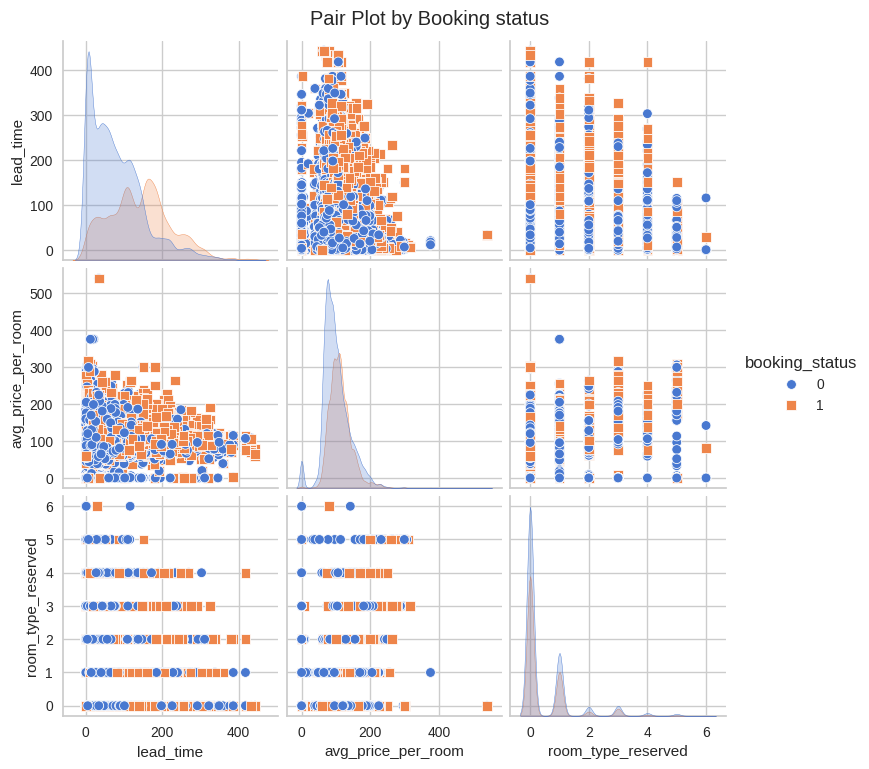

In [8]:
'''
    - lead_time,avg_price_per_room = 고유값이 가장 많은 feature
    - room_type_reserved           = 범주형 데이터중 고유값이 많은 feature
    - 위의 두가지 이유로 booking_status (target)값과 대조하는 pairplot 생성
'''
plt.figure(figsize=(12, 8))
sns.pairplot(train[['lead_time', 'avg_price_per_room', 'room_type_reserved', 'booking_status']],
             hue='booking_status',
             markers=["o", "s",],palette='muted')
plt.suptitle('Pair Plot by Booking status', y=1.02);
plt.show()

### Violinplot + histplot

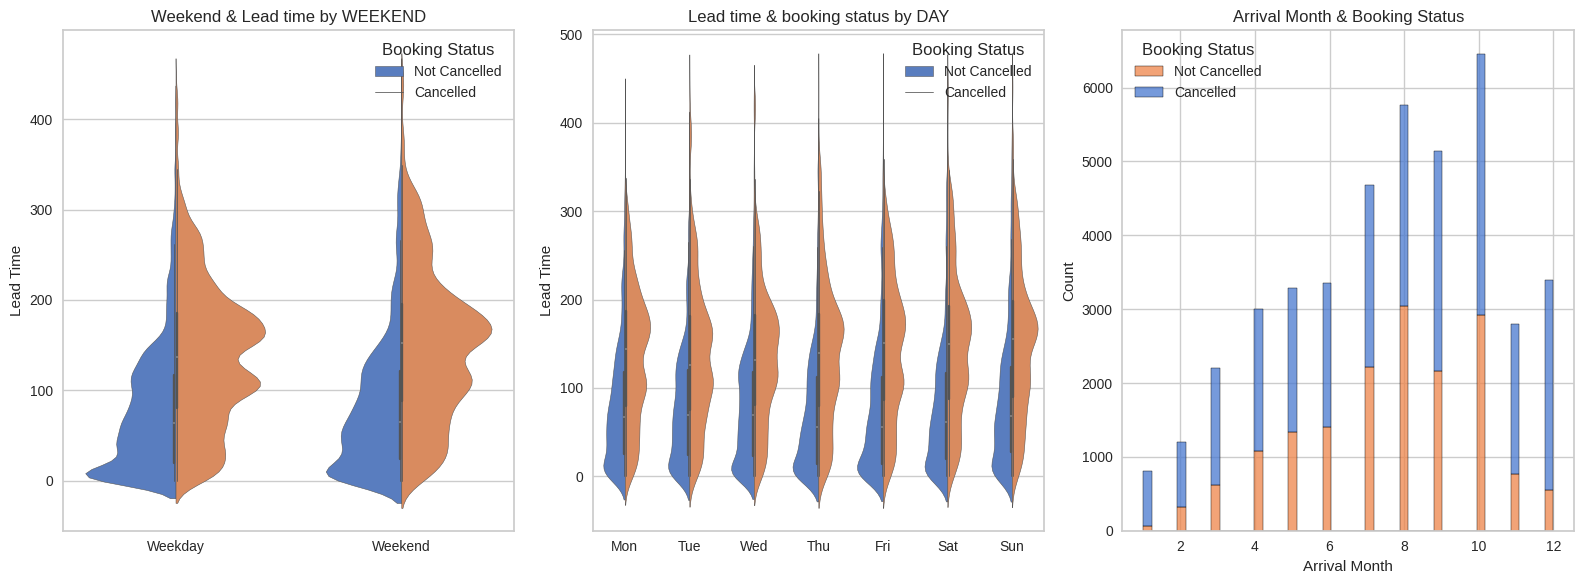

In [ ]:
# create canvas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

# Weekend & Lead time by WEEKEND
sns.violinplot(data=train, x='weekend', y='lead_time',legend=False, hue='booking_status', palette='muted', split=True, ax=ax1)
ax1.set_title('Weekend & Lead time by WEEKEND')
ax1.set_xlabel('')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Weekday', 'Weekend'])
ax1.set_ylabel('Lead Time')
ax1.legend(title='Booking Status',labels=['Not Cancelled', 'Cancelled'], loc='upper right')

# Lead time & booking status by DAY
sns.violinplot(data=train, x='weekday', y='lead_time',legend=False, hue='booking_status', palette='muted', split=True, ax=ax2)
ax2.set_title('Lead time & booking status by DAY')
ax2.set_xlabel('')
ax2.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax2.set_ylabel('Lead Time')
ax2.legend(title='Booking Status',labels=['Not Cancelled', 'Cancelled'] ,loc='upper right')

# Arrival Month & Booking Status
sns.histplot(data=train, x="arrival_month", hue="booking_status", multiple="stack", legend=False, palette='muted', ax=ax3)
ax3.set_title('Arrival Month & Booking Status')
ax3.set_xlabel('Arrival Month')
ax3.set_ylabel('Count')
ax3.legend(title='Booking Status', labels=['Not Cancelled', 'Cancelled'], loc='upper left')

plt.tight_layout()
plt.show()

### Countplot + boxplot

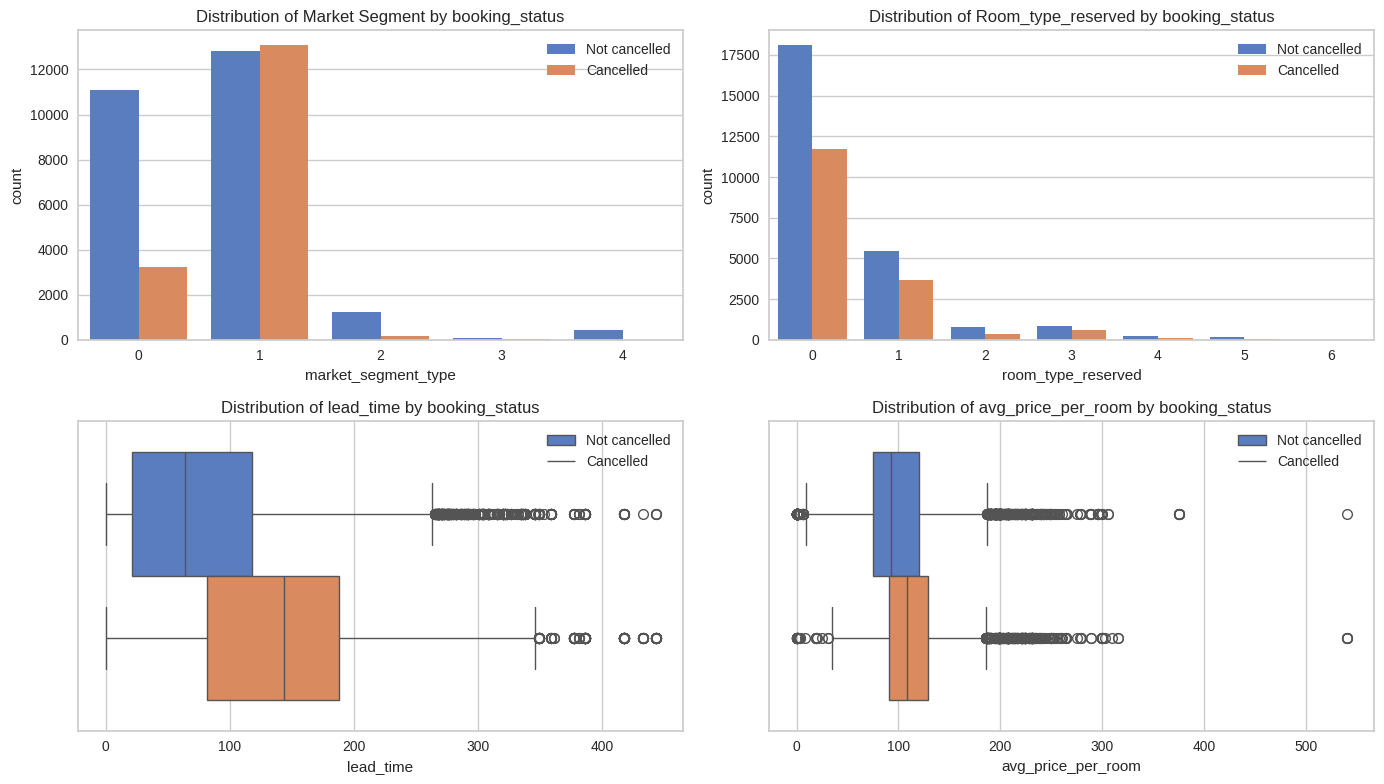

In [ ]:

# 그래프 생성
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 8))

# Market Segment by booking_status
sns.countplot(data=train, x='market_segment_type', hue='booking_status', palette='muted', ax=ax1)
ax1.set_title('Distribution of Market Segment by booking_status')
ax1.legend(labels=['Not cancelled', 'Cancelled'])

# Room Type Reserved by booking_status
sns.countplot(data=train, x='room_type_reserved', hue='booking_status', palette='muted', ax=ax2)
ax2.set_title('Distribution of Room_type_reserved by booking_status')
ax2.legend(labels=['Not cancelled', 'Cancelled'])

# Lead Time by booking_status
sns.boxplot(data=train, x='lead_time', hue='booking_status', palette='muted', ax=ax3)
ax3.set_title('Distribution of lead_time by booking_status')
ax3.legend(labels=['Not cancelled', 'Cancelled'])

# Avg Price per Room by booking_status
sns.boxplot(data=train, x='avg_price_per_room', hue='booking_status', palette='muted', ax=ax4)
ax4.set_title('Distribution of avg_price_per_room by booking_status')
ax4.legend(labels=['Not cancelled', 'Cancelled'])

plt.tight_layout()
plt.show()

## 모델별 구동일지

In [ ]:
# 알고리즘 구동 일지
exp_log = [
    ['2022-04-11', 'LR', '-', 'iter2500, ratio0.8', .83267, '-'],
    ['2022-04-11', 'DT', '-', 'dep7, ratio0.8',  .87261, '-'],
    ['2022-04-12', 'RF', '-', 'dep10, features0.5, estimators100, ratio0.9', '-', .89020],
    ['2022-04-12', 'RF', 'gridCV', 'dep13, features0.5, estimators57, ratio0.9', .88890, .89039],
    ['2022-04-12', 'RF', 'Bayesian', 'dep18, leaf_nodes83, leaf2, split5, estimators249', .88242, '-'],
    ['2022-04-12', 'RF', 'gridCV', 'StandardScaler 적용', .88250, '-'],
    ['2022-04-12', 'RF', 'gridCV', 'RobustScaler 적용', .88263, '-'],
    ['2022-04-12', 'RF', 'gridCV', '2017년 데이터제외', .87701, '-'],
    ['2022-04-13', 'xg,lgbm,cat', 'AutoML', 'fold5, fold5, ratio0.9, Accuracy', '0.83242*', .90010],
    ['2022-04-14', 'xg,lgbm,cat,lr', 'AutoML', 'fold5, fold5, ratio0.9, AUC', '0.84691*', .89565],
    ['2022-04-14', 'xg,lgbm,cat', 'AutoML', 'fold5, fold10, ratio0.9, Accuracy, 날짜변환', '0.85807*', .89910],
    ['2022-04-16', 'xg,lgbm,cat', 'AutoML', 'fold10, fold30, ratio0.9, AUC', '0.85483*', '-'],
    ['2022-04-16', 'xg,lgbm,cat', 'AutoML', 'fold10, fold30, ratio0.9, AUC, 피처2제거', '0.84268*', .89851],
    ['2022-04-16', 'xg,lgbm,cat', 'AutoML', 'fold10, fold30, ratio0.9, AUC, 중복값제거', '0.85483*', .89910],
    ['2022-04-16', 'xg,lgbm,cat', 'AutoML', 'fold10, fold30, ratio0.9, AUC, 타겟변환', '-', .90484],
    ['2022-04-16', 'xg,lgbm,cat', 'AutoML', 'fold10, fold10, ratio0.9, AUC, 중복값제거, 타겟변환', '-', .90735],
    ['2022-04-17', 'xg,lgbm,cat', 'AutoML', 'fold10, fold10, ratio0.9, AUC, 중복값피처2제거, 타겟변환', '-', .90037],
    ['2022-04-17', 'xg,lgbm,cat', 'AutoML', 'fold10, fold30, ratio0.9, AUC, 중복값피처2제거, 타겟변환', '0.84725*', '-'],
    ['2022-04-17', 'xg,lgbm,cat', 'AutoML', 'fold10, fold10, ratio0.9, AUC, 중복값피처2제거, 분류추가, 타겟변환', .90242, .91166],
    ['2022-04-17', 'xg,lgbm,cat', 'AutoML', 'fold10, fold10, ratio0.9, AUC, 중복값제거, 분류추가, 타겟변환', .90258, .91167],
    ['2022-04-17', 'xg,lgbm,cat', 'AutoML', 'fold10, fold10, ratio0.8, AUC, 중복값제거, 분류추가, 타겟변환, Kfold', .90277, .91205],
    ['2022-04-17', 'xg,lgbm,cat', 'AutoML', 'fold10, fold10, ratio0.8, Accuracy, 중복값제거, 분류추가, 타겟변환', .9038, .91256],
]

progress = pd.DataFrame(exp_log, columns=['date', 'model', 'tools', 'notes', 'AUC_CV', 'submission'])
display(progress.tail())
text="(*)4월13~17일 AutoML 결과값 accuracy값 출력, 일부 값 단위가 상이함."
print("{:>100}".format(text))

,date,model,tools,notes,AUC_CV,submission
17,2022-04-17,"xg,lgbm,cat",AutoML,"fold10, fold30, ratio0.9, AUC, 중복값피처2제거, 타겟변환",0.84725*,-
18,2022-04-17,"xg,lgbm,cat",AutoML,"fold10, fold10, ratio0.9, AUC, 중복값피처2제거, 분류추가,...",0.90242,0.91166
19,2022-04-17,"xg,lgbm,cat",AutoML,"fold10, fold10, ratio0.9, AUC, 중복값제거, 분류추가, 타겟변환",0.90258,0.91167
20,2022-04-17,"xg,lgbm,cat",AutoML,"fold10, fold10, ratio0.8, AUC, 중복값제거, 분류추가, 타겟...",0.90277,0.91205
21,2022-04-17,"xg,lgbm,cat",AutoML,"fold10, fold10, ratio0.8, Accuracy, 중복값제거, 분류추...",0.9038,0.91256


                                                  (*)4월13~17일 AutoML 결과값 accuracy값 출력, 일부 값 단위가 상이함.


In [5]:

train.drop(columns=['weekday', 'weekend'], axis=1, inplace=True)
train_list = list(train.columns[0:8]) + list(train.columns[11:-2]) + list(train.columns[-1:])
# 중복값 제거를 위한 전체 컬럼 리스트 세팅, 기존 연도월일 제외하고 datetime 포함


# train 중복값 찾기
train_no_target= train.drop(columns='booking_status', axis=1) # 타겟값 제외
train_dup= train_no_target[train_no_target.duplicated()] # (564, 18)

train_dup_del= train.drop_duplicates(subset=train_list , keep='first', ignore_index=True)
train_dup_del.shape # 중복 제거 결과값

(41536, 19)

In [6]:
train_dup_del # 1차 인코딩으로 중복값 제거했으나 datetime 존재, id 피처 없음
train_final= train_dup_del.drop(columns=['datetime'], axis=1) #불필요한 피처 datetime 제거

## AutoML 과정

⇓아래 코드의 실행시간은 대략 50분정도입니다

In [ ]:
X = train_final.drop(columns='booking_status', axis=1)
y = train_final['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

clf = setup(data= train_final,
      target = 'booking_status',
      verbose = False,
      train_size= 0.8,
      data_split_shuffle= True,
      session_id = 100,
      normalize = True,
      categorical_features= ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
                             'market_segment_type', 'repeated_guest', 'no_of_special_requests'],
      numeric_features= ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                         'no_of_week_nights', 'avg_price_per_room', 'lead_time','no_of_previous_cancellations',
                         'no_of_previous_bookings_not_canceled' ])

# 최고 성능 보인 3개 모델 선정, candidate_models로 묶음
model_lightgbm = create_model('lightgbm', fold=10)
model_xgboost = create_model('xgboost', fold=10)
model_catboost = create_model('catboost', fold=10)

tune_model_xgboost = tune_model( model_xgboost, fold=10, optimize='Accuracy', choose_better=True)
tune_model_lightgbm = tune_model( model_lightgbm, fold=10, optimize='Accuracy', choose_better=True)
tune_model_catboost = tune_model( model_catboost, fold=10, optimize='Accuracy', choose_better=True)
candidate_models = [tune_model_xgboost, tune_model_lightgbm, tune_model_catboost]

blender_top = blend_models(estimator_list=candidate_models,
                            fold=10, verbose=True, method='auto', optimize='Accuracy')
blender_tune = tune_model(blender_top)

final_model = finalize_model(blender_tune)

In [ ]:
final_model.fit(X_train, y_train)

y_pred_final = predict_model(final_model, data=X_test, verbose=False)
y_pred_proba = final_model.predict_proba(X_test)[:, -1]

# 정확도 계산
accuracy_final = accuracy_score(y_test, y_pred_final['prediction_label'])
print("Final Model:", final_model.__class__, "정확도:", accuracy_final)

# ROC 곡선 및 AUC 계산
fpr, tpr, _ = roc_curve(y_test.values, y_pred_proba)
roc_auc = auc(fpr, tpr)

# 테스트 데이터에 대한 예측
y_pred_submission = final_model.predict_proba(test)[:, 1]
submission['booking_status'] = y_pred_submission
print("ROC AUC:", roc_auc)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will b

## 최종 결론

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      5066
           1       0.79      0.77      0.78      3242

    accuracy                           0.83      8308
   macro avg       0.82      0.82      0.82      8308
weighted avg       0.83      0.83      0.83      8308



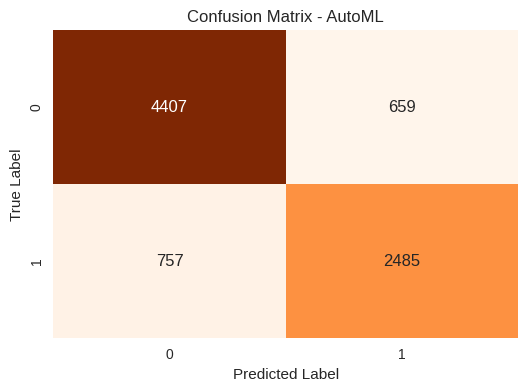

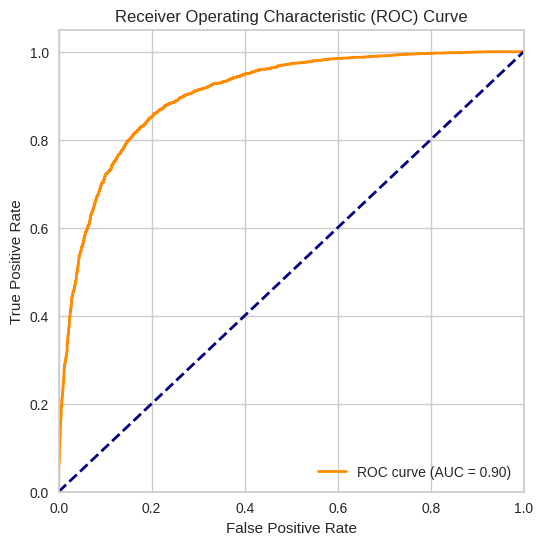

In [ ]:
print('Classification Report:\n', classification_report(y_test, y_pred_final['prediction_label']))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_final['prediction_label']), annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - AutoML')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# 모델 학습 후 submission 결과가 나온 다음 진행할 것

# id 적용안한 자료 불러옴

train = pd.read_csv('https://raw.githubusercontent.com/ppianist89/Kaggle_Finalproject_1/main/train.csv')
test  = pd.read_csv('https://raw.githubusercontent.com/ppianist89/Kaggle_Finalproject_1/main/test.csv')


# 테스트 데이터 컬럼 정리
test_tolist= test.drop(columns='id').columns.tolist()

# 테스트에서 merge로 cloumn, value가 같은 중복 값을 찾는다
duplicated_target= test.merge(train.drop(columns='id'), on= test_tolist, how='inner')[['id', 'booking_status']]

# 타겟 값을 바꿔주는 dict {0: 1, 1: 0}
submission_dict= {0: submission['booking_status'].max(), 1: submission['booking_status'].min()}

# id가 동일한 타겟값은 dict 매핑으로 바꿔준다
submission.loc[submission['id'].isin(duplicated_target['id']),'booking_status'] = duplicated_target['booking_status'].map(submission_dict).values

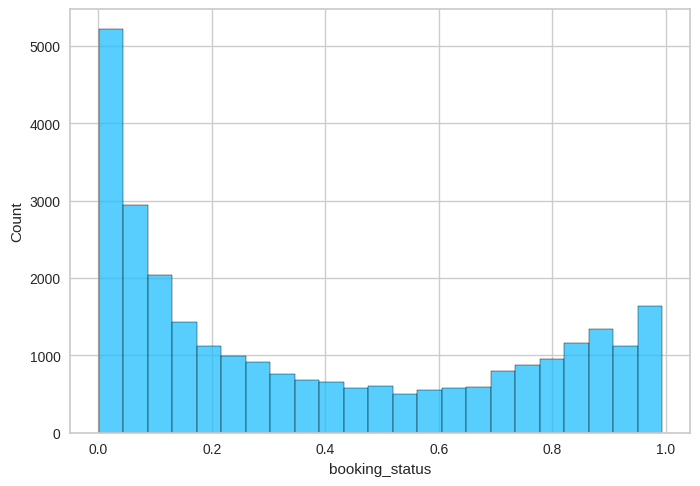

In [ ]:
sns.histplot(submission['booking_status'], color='#20BEFF');